# What is a Neural Network?

So what is neural network? When most people hear of a neural network they think of some magical black box that is capable of solving very complicated problems. In reality neural network is just a very fancy math formula, well kind of. A nueral network is biologically inspired and named after the network of neurons that exist in your brain. A neural network is simply a group of connected neurons, there are some input neurons, some output neurons and a group of what we call hidden neurons in between. When we feed inforamtion to the input neurons we get some information from the output neurons. Information starts at the input neurons and travels to the next layers of neurons having whats called a weight and a bias applied to it. These weight to the next layers of neurons having whats called a weight and a bias applied to it. These weight and biases start out randomly determined and are tweaked as the network learns and see more data. After reaching a new layer there is a function applied to each neurons value that is called an activation function.

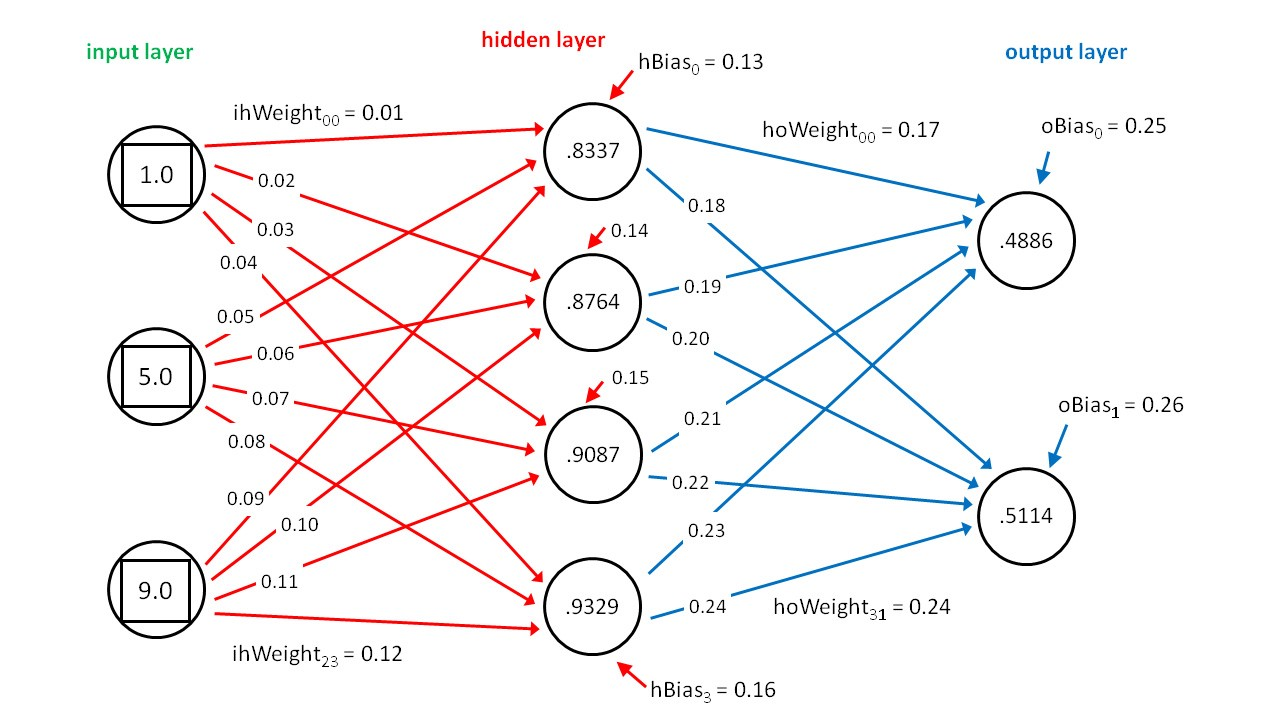

# Installing Tensorflow 2.0

To install type:
pip install -q tensorflow==2.0.0-alpha0

If you are having any troubles try following the instructions on the tensorflow website.

# Importance of Data
Data is by far the most important part of any neural network. Choosing the right data and transforming it into a form that the neural network can use and understand is vital and will affect the networks performance. This is because the data we pass the network is what it will use to modify its weights and biases!

# Keras Datasets
The dataset we will use to start is the Fashion MNIST dataset. This dataset contains 60000 images of different clothing/apparel items. The goal of our network will be to look at these images and classify them appropriately. To load our first dataset in we will do the following:

In [3]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt

data = keras.datasets.fashion_mnist

In [4]:
# Now we will split our data into training and testing data. It is important that we do this so we can test the 
# accuracy of the model on data it has not seen before.
(train_images,train_labels), (test_images,test_labels) = data.load_data()

4423680/4422102 [==============================] - 4s 1us/step


In [5]:
# Finally we will define a list of class names and pre-process images.
# We do this by dividing each image by 255.
# Since each image is greyscale we are simply scaling the pixel values down to make computations easier for our model
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','shirt','Sneaker','Bag','Ankle boot']

train_images = train_images/255.0
test_images = test_images/255.0

# Creating the Model
Now time to create Neural network model. We will do this by using the Sequential object from keras. A Sequential model simply defines a sequence of layers starting with the input layer and ending with the output layer. Our model will have 3 layers, and imput layer of 784 neurons (representing all of the 28x28 pixels in a picture) a hidden layer of an arbitrary 128 neurons and an output layer of 10 neurons representing the probability of the picture being each of the 10 classes

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(10, activation='softmax')
])

# Training the Model
Now that we have defined the model it is time to compile and train it. Compiling the model is just picking the optimizer, loss function and metrics to keep track of. Training is the process of passing our data of the model.

In [9]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.fit(train_images,train_labels, epochs=25)

Train on 60000 samples
Epoch 1/25
60000/60000 [==============================] - 3s 51us/sample - loss: 0.2808 - accuracy: 0.8961
Epoch 2/25
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2700 - accuracy: 0.8998
Epoch 3/25
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2573 - accuracy: 0.9030
Epoch 4/25
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2491 - accuracy: 0.9069
Epoch 5/25
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2378 - accuracy: 0.9111
Epoch 6/25
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2312 - accuracy: 0.9138
Epoch 7/25
60000/60000 [==============================] - 3s 46us/sample - loss: 0.2243 - accuracy: 0.9155
Epoch 8/25
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2165 - accuracy: 0.9186
Epoch 9/25
60000/60000 [==============================] - 3s 46us/sample - loss: 0.2116 - accuracy: 0.9204
Epoch 10/25
60

# Testing the Model
Now the model has been trained it is time to test it for accuracy.

In [10]:
test_loss, test_acc = model.evaluate(test_images,test_labels)

print('\nTest accuracy:', test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================


Test accuracy: 0.8792


# Using the Model
Now that we have trained the model it is time to actually use it! We will pick a few images from our testing data, show them on the screen and then use the model to predict what they are.

To make predictions we use our model name and .predict() passing it a list of data to predict. It is important that we understand it is used to make MULTIPLE predictions and that whaterver data it is expecting must be inside of a list. Since it is making multiple predictions it will also return to use a list of predicted values.

In [11]:
predictions = model.predict(test_images)

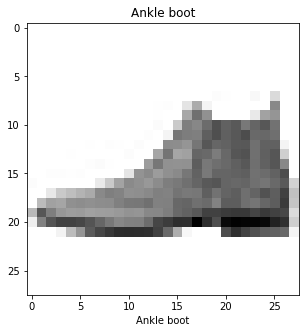

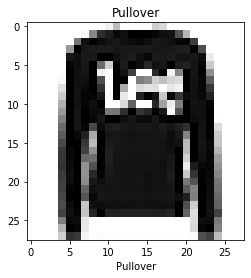

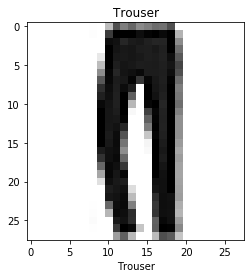

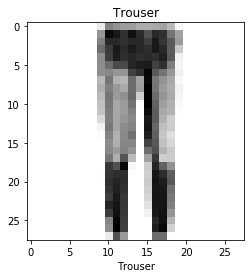

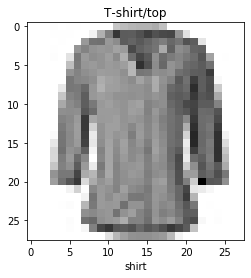

In [12]:
# Now we will display the first 5 images and thier predictions using matplotlib
plt.figure(figsize=(5,5))
for i in range(5):
    plt.grid(False)
    plt.imshow(test_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]])
    plt.title(class_names[np.argmax(predictions[i])])
    plt.show()